[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/talmago/cs231n/blob/master/assignment1.ipynb)

# Deep Learning Theoretical Aspects - Assignment 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.


Given a network of N layers and a linear activation function for each layer we can say that each layer is a linear function of its input, which is also the output of the previous layer. Therefore, each layer can be considered as a "linear" function of the input. This means that we can replace every 2 layers with a single layer that will use a linear combination of the activations. Now we can also reduce N layers to a single layer in the same way.

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1 Sigmoid
<img src="https://cdn-images-1.medium.com/max/1200/1*Vo7UFksa_8Ne5HcfEzHNWQ.png" width="150">

Let's denote the sigmoid function as $σ(x)=\frac{1}{1+e^{-x}}$.


The derivative of the sigmoid is:

$\frac{d}{dx}σ(x)$ = 

$\frac{d}{dx}[\frac{1}{1+e^{-x}}]$ =

$\frac{d}{dx}({1+e^{-x}})^{-1}$ =

$-({1+e^{-x}})^{-2}(-e^{-x})$ =

$\frac{e^{-x}}{(1+e^{-x})^2}$ =

$(\frac{1}{1+e^{-x}})(\frac{e^{-x}}{1+e^{-x}})$ =

$σ(x)(1−σ(x))$.

2 Relu 

<img src="https://cloud.githubusercontent.com/assets/14886380/22743194/73ca0834-ee54-11e6-903f-a7efd247406b.png" width="200">

$\frac{df}{dx} = \begin{cases}
    0,& \text{if } x<0\\
    1,& \text{if } x>0
\end{cases}$

Notice that $\frac{df}{dx}$ is not defined for x = 0.

3 Softmax
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e348290cf48ddbb6e9a6ef4e39363568b67c09d3" width="250">

We'll be using the quotient rule of derivatives:

$f(x) = \frac{g(x)}{h(x)}$ => $f'(x)$ = $\frac{g'(x)h(x) + h'(x)g(x)}{[h(x)]^2}$


In our case, we have:

$g_i = e^{z_i}$

$h_i = \sum_{k=1}^{N} e^{z_k}$

So, Note that no matter which $z_j$ we compute the derivative of $h_i$ it will always be $e^{z_j}$. For $g_i$ it is slightly different as the derivative is 0 if $i \ne j$ and $e^{z_j}$ otherwise. 

So finally we can apply what we know to the quotient rule, 

(we denote $\sum = \sum_{k=1}^{N} e^{z_k} $ )    

For $i = j$ , 

$\frac{d}{dz_i}\sigma(z)_j = \frac{e^{Z_i}\sum - e^{Z_i}e^{Z_j}}{\sum^2}$ = 
$\frac{e^{Z_i}}{\sum} \frac{\sum - e^{Zj}}{\sum} = \sigma(z)_i (1 - \sigma(z)_j) $


For $i \ne j$,

$\frac{d}{dz_i}\sigma(z)_j = \frac{0 - e^{Z_i}e^{Z_j}}{\sum^2} = -\frac{e^{Z_i}}{\sum} \frac{e^{Zj}}{\sum} = - \sigma(𝑧)_𝑖 \sigma(𝑧)_𝑗$

So, finally, 

$\frac{d}{dz_i}\sigma(z)_j = \begin{cases}
    \sigma(z)_i (1 - \sigma(z)_j),& \text{if } i=j\\
    - \sigma(𝑧)_𝑖 \sigma(𝑧)_𝑗,& \text{if } i\ne j
\end{cases}$

### Back Propagation
Use the delta rule and backprop to compute the derivatives for these computations:

```
z = x1 + 5*x2 - 3*x3^2
```

If $z = x_1 + 5*x_2 - 3x_3^2$, then we can denote $f = q - u$ where $q = x_1 + 5x_2$ and $u = 3x^2$.

$\frac{df}{du} =1$

$\frac{df}{dq} = -1$

$\frac{dq}{dx_1} = 1$  

$\frac{dq}{dx_2} = 5$

$\frac{dq}{dx_3} = 0$

$\frac{du}{dx_1} =\frac{du}{dx_2} = 0$ 

$\frac{du}{dx_3} = 6x_3$

Now, let's use the chain rule:

$\frac{df}{dx_1} = \frac{df}{dq}\frac{dq}{dx_1} + \frac{df}{du}\frac{du}{dx_1} = 1\cdot1 + (-1)\cdot0 = 1$

$\frac{df}{dx_2} = \frac{df}{dq}\frac{dq}{dx_2} + \frac{df}{du}\frac{du}{dx_2} = 1\cdot5 + (-1)\cdot0 = 5$

$\frac{df}{dx_3} = \frac{df}{dq}\frac{dq}{dx_3} + \frac{df}{du}\frac{du}{dx_3} = 1\cdot1 + (-1)\cdot6x_3 = 1-6x_3$

```
z = x1*(x2-4) + exp(x3^2) / 5*x4^2
```

Let's denote:

$f_1(x) = x-4$,
$f_2(x) = x^2$,
$f_3(x) = 1/x^2$,
$f_4(x) = e^x$

In our case:

$z = x_1 \cdot f_1(x_2) + 1/5 \cdot f_3(x_4) \cdot f_4(f_2(x_3)) $

Derivativies:

$\frac{df_1}{dx} = 1$

$\frac{df_2}{dx} =2x$

$\frac{df_3}{dx} =-2x^{-3}$

$\frac{df_4}{dx} =e^x$

From product rule:

$\frac{dz}{dx_1} = 1 \cdot {f_1}(x_2) = x2-4$

$\frac{dz}{dx_2} = x_1 \frac{df_1}{dx_2} = x1 \cdot 1 = x1$

From chain rule:

$\frac{d (f_4 \cdot f_2) }{dx_3} = \frac{df_4}{dx_3} f_2(x3) \frac{df_2}{dx_3} = e^{x_3^3}\cdot x_3^2 \cdot 2x_3 = 2x_3^{3}e^{x_3^3}$


$\frac{df_3}{dx_4} = -2x_4^{-3} $

Now the product:

$\frac{dz}{dx_3} = 0.2 f_3(x_4) \frac{d (f_4 \cdot f_2) }{dx_3} = 0.2 \cdot \frac{1}{x_3^2}\cdot 2x_3^{3}e^{x_3^3} = 0.4 x_3^2 e^{x_3^3}$

$\frac{dz}{dx_4} = 0.2 \frac{df_3}{dfx_4} (f_4 \cdot f_2) (x_3) = 0.2 \cdot  -2x_4^{-3} \cdot $

```
z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
```

In [0]:
# Write your answer here

### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

#### Apply to arrays
Apply the convolutions above to the following array:


In [2]:
k1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0, 0] ])
k2 = np.array([ [0, 0, 0], [0, 0, 1], [0, 0, 0] ])
k3 = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ])
k4 = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]) / 9

x = np.array([
    [-1, -3, -4,  0, -1],
    [ 2, -2, -4,  0, -2],
    [-3, -2,  2,  2,  3],
    [ 0, -3, -4, -4, -2],
    [-4, -2,  2,  0,  1]
])

def apply_filter(x, f, stride=1, padding=0):
    xh, xw = x.shape
    fh, fw = f.shape
  
    h_out = int((xh - fh + 2 * padding) / stride + 1)
    w_out = int((xw - fw + 2 * padding) / stride + 1)
    out = np.zeros((h_out, w_out))
  
    for i in range(padding, h_out-padding, stride):
        for j in range(padding, w_out-padding, stride):
            cell = x[i - padding:i - padding+fh, j - padding:j - padding+fw]
            out[i, j] = np.sum(cell*f)
    return out

# Demonstrate with `k1` filter
apply_filter(x, k1)

array([[-2., -4.,  0.],
       [-2.,  2.,  2.],
       [-3., -4., -4.]])

What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1 
1. Zero padding, stride of 2

Answer:
1. (3,3)
2. (2,2)                  
3. (5,5) = (solution 1 with additional 2-padding)
4. (5,5) = (solution 2 with additional 3-padding)

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

$$ dim = (D_{input}, \frac{W_{input} - W_{filter} + 2P)} {S} + 1, \frac{H_{input} - H_{filter} + 2P)} {S} + 1)$$

s.t. $$ D = depth, W = width, H = height, P = padding, S = stride $$

In [0]:
# Below is a python-code for the formula above
def get_conv_layer_out_dim(X_shape, filter_shape, padding=0, stride=1):  
    h_x, w_x = X_shape
    h_f, w_f = filter_shape
    h_out = int((h_x - h_f + 2 * padding) / stride + 1)
    w_out = int((w_x - w_f + 2 * padding) / stride + 1)
    return h_out, w_out

assert get_conv_layer_out_dim((28,28), (3,3), padding=0, stride=1) == (26,26)
assert get_conv_layer_out_dim((28,28), (5,5), padding=0, stride=1) == (24,24)
assert get_conv_layer_out_dim((28,28), (7,7), padding=0, stride=1) == (22,22)

#### Apply to images
Apply the convolution filters above on the image. Plot the results:

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


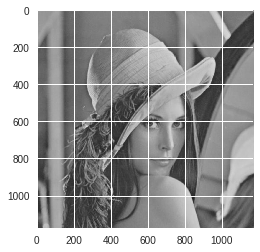

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

im = mpimg.imread('/content/gdrive/My Drive/assignment1/lena.jpg')
plt.imshow(im)

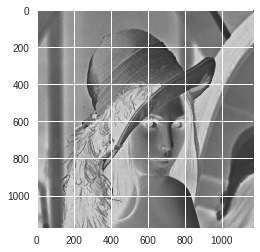

In [19]:
im2 = np.zeros(im.shape)
im2[:, :, 0] = apply_filter(im[:, :, 0], k1, padding=1)
im2[:, :, 1] = apply_filter(im[:, :, 1], k1, padding=1)
im2[:, :, 2] = apply_filter(im[:, :, 2], k1, padding=1)
plt.imshow(im2)

### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


-  Convolutional Layer #1: (28, 28, 1) -> (24, 24, 32), parameters: (24 X 24 X 1) X 32 = 18464
-  Pooling Layer #1: (24, 24, 32) -> (12, 12, 32), parameters: 0
-  Convolutional Layer #2: (12, 12, 32) -> (6, 6, 64), parameters: (12 X 12 X 32) * 64 = 294912
-  Pooling Layer #2: (6, 6, 64) -> (3, 3, 64), parameters: 0
-  Dense Layer #1: (3, 3, 64) -> (1024, ), parameters:  3 X 3 X 64 X 1024 = 589824. 
-  Dense Layer #2: (1024,) -> (10,), parameters: 1024 X 10 = 10240.

$$ Conv_{dim} = (Depth_{input}, \frac{W_{input} - W_{filter} + 2P)} {S} + 1, \frac{H_{input} - H_{filter} + 2P)} {S} + 1)$$

$$ Conv_{parameters} = (Conv_{dim_0} \cdot Conv_{dim_1} \cdot Conv_{dim_2}) * Conv_{filters} $$

$$ MaxPool_{dim} = (Depth_{input}, \frac{W_{input - K}}{S} + 1, \frac{H_{input} - K}{S} + 1)$$

$$ MaxPool_{parameters} = 0 $$

### Learning in biological neurons
Try to come up with a learning algorithm for a neural network that replaces back propagation, and mimicks the operation of biological neurons.

In [0]:
# Write your answer here

### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.

Ideally, we would want to plot a confussion matrix for the 1000 classes and then iterate over the rows and try to locate a row which assigns a probability equals or larger than 0.5 to another class. Then, we can use another confussion matrix (from a different net) for validation or alternatively use a majority vote based on the 3 networks. 

#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:


<img src="http://ufldl.stanford.edu/wiki/images/math/a/2/3/a23bea0ab48ded7b9a979b68f6356613.png" width="250">

We'll numerically approximate it using:

<img src="http://ufldl.stanford.edu/wiki/images/math/4/8/a/48a000aed96c8595fcca2a45f48343ce.png" width="250">

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [20]:
def local_gradient(f, x0, epsilon=1e-6):
    f0 = f(x0)
    d = len(x0)
    grad = np.zeros((d,), np.float)
    eps = np.zeros((d,), np.float)
    for dim in range(d):
        eps[dim] = epsilon
        grad[dim] = (f(x0 + eps) - f0) / epsilon
        eps[dim] = 0.0
    return grad

# f = x1^3 + 2x2^2
f = lambda x: x[0]**3 + 2*x[1]**2

# df/dx1 = 3x1^2, df/dx2 = 4x2
grad_f = lambda x: np.array([3 * x[0]**2, 4*x[1]])

for x0 in [[1.0,1.0], [1.5,-1.5]]:
    print('local_gradient(1,2) = ', local_gradient(f, x0))
    print('gradient(1,2) = ', grad_f(x0))

local_gradient(1,2) =  [3.000003 4.000002]
gradient(1,2) =  [3. 4.]
local_gradient(1,2) =  [ 6.7500045 -5.999998 ]
gradient(1,2) =  [ 6.75 -6.  ]
